In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model.univariate import LstmForecast
from ts.plot import Plot

In [6]:
def tryModelOneSeq(trainSequences, testData):
    model = LstmForecast(
        forecastHorizon=1,
        stateSize=50,
        activation='tanh',
        numRnnLayers=3
    )

    loss = model.train(
        trainSequences=trainSequences,
        numIterations=15,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.03,
                20,
                0.96
            )
        )
    )

    Plot.plotLoss(loss)

    trainPlot = 5
    for i, idx in enumerate(list(np.random.randint(0, len(trainSequences), size=(trainPlot,)))):

        seq = trainSequences[idx]
        evalLoss, Ypred = model.evaluate(seq, returnPred=True)
        Ytrue = seq[1:]
        print(f'Training Eval Loss: {evalLoss}')

        Plot.plotPredTrue(
            Ypred,
            Ytrue,
            'Train Data'
        )

    testLoss, Ypred = model.evaluate(testData, returnPred=True)
    Ytrue = testData[1:]
    print(f'Test Eval Loss: {testLoss}')
    
    Plot.plotPredTrue(Ypred, Ytrue, 'Test Data')

In [7]:
def tryModelMultiSeq(trainSequences, testData):

    model = LstmForecast(
        forecastHorizon=1,
        stateSize=10,
        activation='tanh',
        numRnnLayers=1
    )

    loss = model.train(
        trainSequences=trainSequences,
        numIterations=15,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.08,
                40,
                0.98
            )
        )
    )

    Plot.plotLoss(loss)

    trainPlot = 5
    for i, idx in enumerate(list(np.random.randint(0, len(trainSequences), size=(trainPlot,)))):
        seq = trainSequences[idx]
        evalLoss, Ypred = model.evaluate(seq, returnPred=True)
        Ytrue = seq[1:]
        print(f'Training Eval Loss: {evalLoss}')

        Plot.plotPredTrue(
            Ypred,
            Ytrue,
            'Train Data'
        )

    testLoss, Ypred = model.evaluate(testData, returnPred=True)
    Ytrue = testData[1:]
    print(f'Test Eval Loss: {testLoss}')

    Plot.plotPredTrue(Ypred, Ytrue, 'Test Data')

In [8]:
# The data generator
dataGenerator = StandardGenerator('long_term')

# Data for single-sequence methods
n = 21500
trainN = 21000
trainData, testData = Utility.trainTestSplit(
    dataGenerator.generate(n),
    train=trainN
)

Epoch 1/15
42/42 [==============================] - 18s 417ms/step - loss: 1.1516
Epoch 2/15
42/42 [==============================] - 18s 425ms/step - loss: 1.0976
Epoch 3/15
42/42 [==============================] - 18s 436ms/step - loss: 1.1059
Epoch 4/15
42/42 [==============================] - 19s 441ms/step - loss: 1.1114
Epoch 5/15
42/42 [==============================] - 18s 433ms/step - loss: 1.1110
Epoch 6/15
42/42 [==============================] - 17s 395ms/step - loss: 1.1080
Epoch 7/15
42/42 [==============================] - 16s 383ms/step - loss: 1.1093
Epoch 8/15
42/42 [==============================] - 16s 382ms/step - loss: 1.0982
Epoch 9/15
42/42 [==============================] - 16s 376ms/step - loss: 1.0940
Epoch 10/15
42/42 [==============================] - 16s 379ms/step - loss: 1.0802
Epoch 11/15
42/42 [==============================] - 16s 388ms/step - loss: 1.0672
Epoch 12/15
42/42 [==============================] - 16s 389ms/step - loss: 1.0664
Epoch 13/15
4

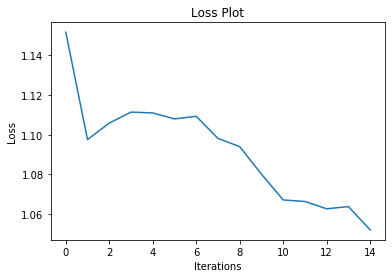

Training Eval Loss: 1.0522488355636597


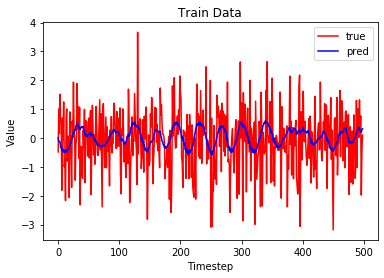

Training Eval Loss: 1.0179351568222046


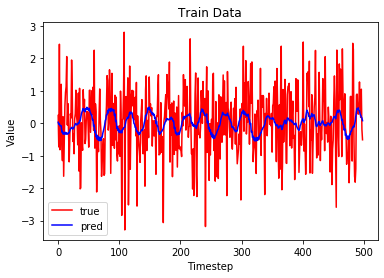

Training Eval Loss: 1.104761004447937


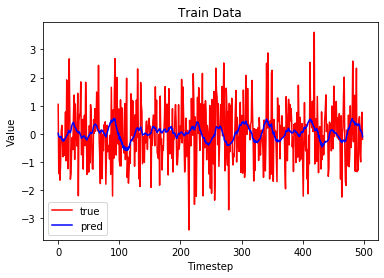

Training Eval Loss: 0.9801333546638489


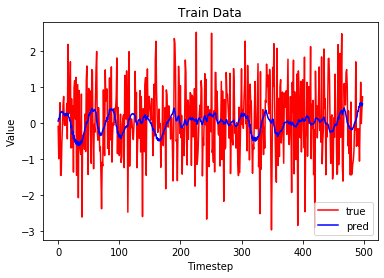

Training Eval Loss: 1.110022783279419


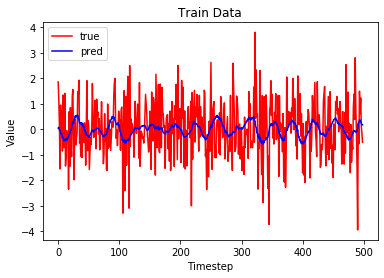

Test Eval Loss: 1.1167412996292114


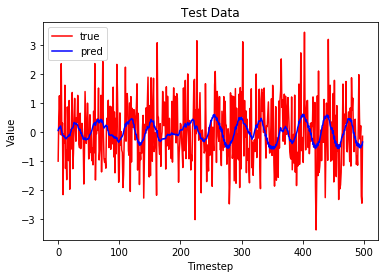

In [10]:
# Method 1 - train on mutually exclusive sequences
seqLength = 500
trainSequences = Utility.breakSeq(trainData, seqLength)
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
42/42 [==============================] - 17s 415ms/step - loss: 1.2910
Epoch 2/15
42/42 [==============================] - 17s 410ms/step - loss: 1.1205
Epoch 3/15
42/42 [==============================] - 17s 398ms/step - loss: 1.1202
Epoch 4/15
42/42 [==============================] - 12s 278ms/step - loss: 1.1207
Epoch 5/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1200
Epoch 6/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1199
Epoch 7/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1197
Epoch 8/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1205
Epoch 9/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1207
Epoch 10/15
42/42 [==============================] - 12s 277ms/step - loss: 1.1206
Epoch 11/15
42/42 [==============================] - 12s 275ms/step - loss: 1.1201
Epoch 12/15
42/42 [==============================] - 12s 276ms/step - loss: 1.1200
Epoch 13/15
4

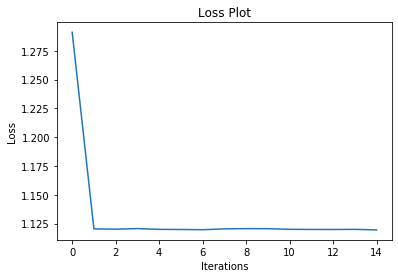

Training Eval Loss: 1.0864695310592651


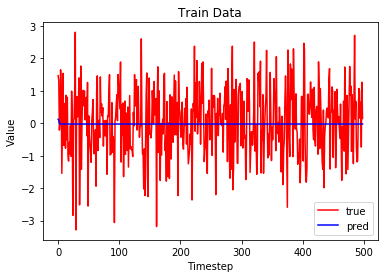

Training Eval Loss: 1.1008150577545166


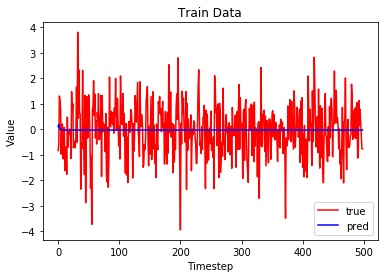

Training Eval Loss: 1.0332777500152588


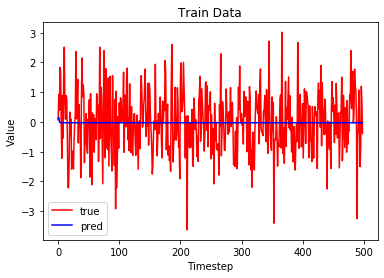

Training Eval Loss: 0.8650051355361938


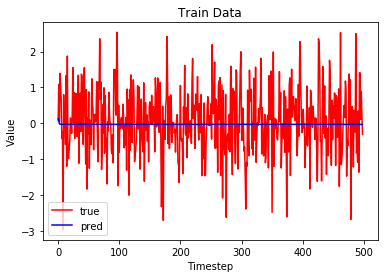

Training Eval Loss: 1.0122849941253662


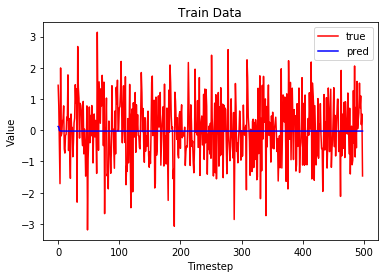

Test Eval Loss: 1.1836106777191162


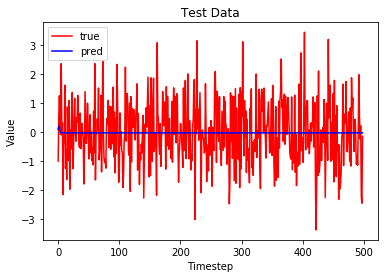

In [11]:
# Method 2 - train on randomly sampled contiguous sequences
seqLength = 500
numSeq = 42
trainSequences = [
    trainData[startIdx: startIdx + seqLength]
    for startIdx in list(np.random.randint(
        0,
        trainN - seqLength,
        size=(numSeq,)
    ))
]
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
1/1 [==============================] - 0s 847us/step - loss: 1.1103
Epoch 2/15
1/1 [==============================] - 0s 827us/step - loss: 1.2338
Epoch 3/15
1/1 [==============================] - 0s 885us/step - loss: 1.2056
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 1.2082
Epoch 5/15
1/1 [==============================] - 0s 1ms/step - loss: 1.2594
Epoch 6/15
1/1 [==============================] - 0s 910us/step - loss: 1.1335
Epoch 7/15
1/1 [==============================] - 0s 913us/step - loss: 1.1139
Epoch 8/15
1/1 [==============================] - 0s 920us/step - loss: 1.1333
Epoch 9/15
1/1 [==============================] - 0s 1ms/step - loss: 1.1064
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 1.1028
Epoch 11/15
1/1 [==============================] - 0s 1ms/step - loss: 1.1126
Epoch 12/15
1/1 [==============================] - 0s 859us/step - loss: 1.1048
Epoch 13/15
1/1 [==============================] - 0s 876us

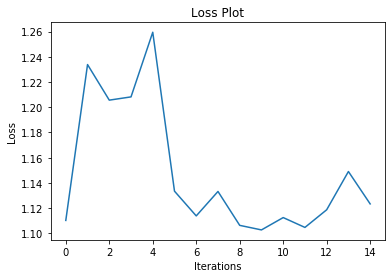

Training Eval Loss: 1.1109199523925781


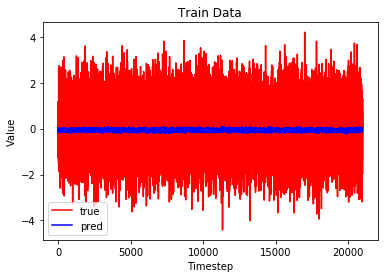

Training Eval Loss: 1.1109199523925781


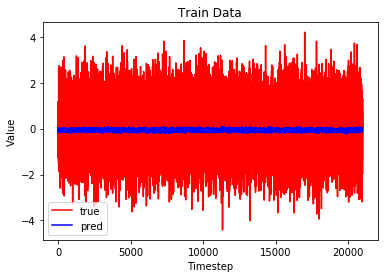

Training Eval Loss: 1.1109199523925781


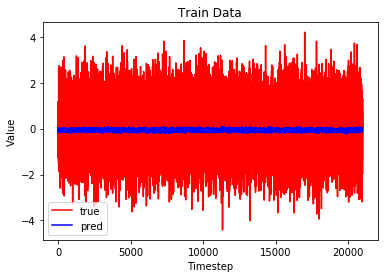

Training Eval Loss: 1.1109199523925781


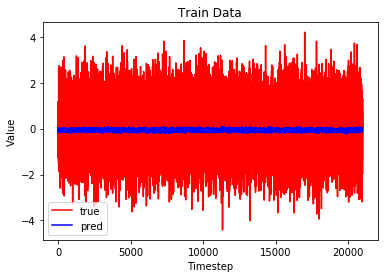

Training Eval Loss: 1.1109199523925781


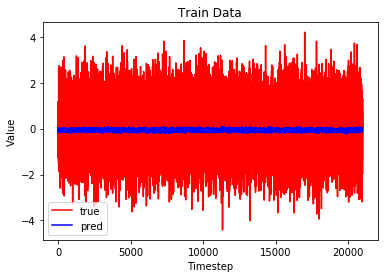

Test Eval Loss: 1.1825393438339233


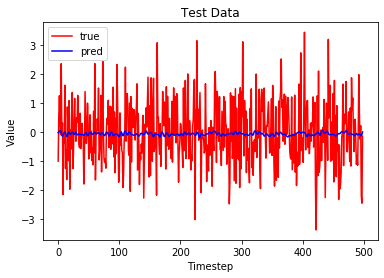

In [12]:
# Method 3 - train on the single long sequence
trainSequences = [trainData]
tryModelOneSeq(trainSequences, testData)

Epoch 1/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1439
Epoch 2/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1300
Epoch 3/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1290
Epoch 4/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1281
Epoch 5/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1305
Epoch 6/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1248
Epoch 7/15
42/42 [==============================] - 4s 88ms/step - loss: 1.1309
Epoch 8/15
42/42 [==============================] - 4s 88ms/step - loss: 1.1315
Epoch 9/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1293
Epoch 10/15
42/42 [==============================] - 4s 87ms/step - loss: 1.1280
Epoch 11/15
42/42 [==============================] - 4s 88ms/step - loss: 1.1278
Epoch 12/15
42/42 [==============================] - 4s 88ms/step - loss: 1.1263
Epoch 13/15
42/42 [==================

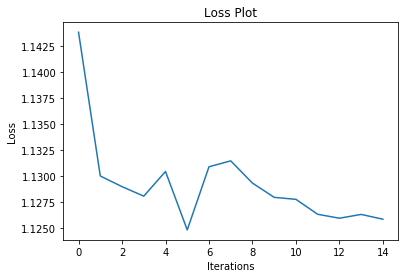

Training Eval Loss: 1.1782307624816895


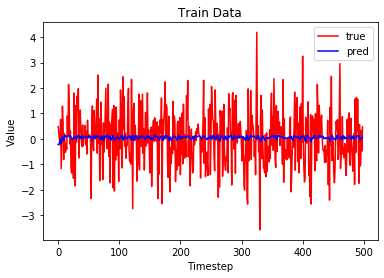

Training Eval Loss: 1.2135950326919556


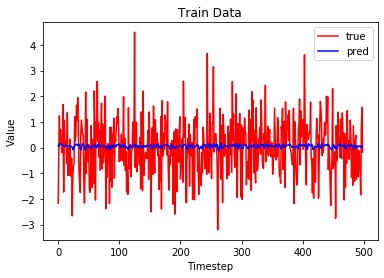

Training Eval Loss: 1.204094648361206


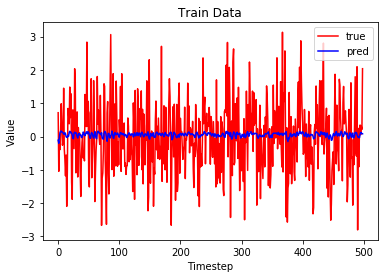

Training Eval Loss: 1.1667009592056274


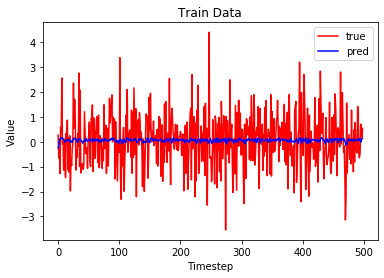

Training Eval Loss: 1.11790132522583


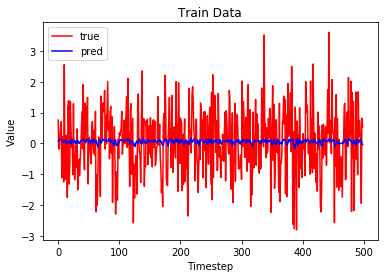

Test Eval Loss: 1.053870677947998


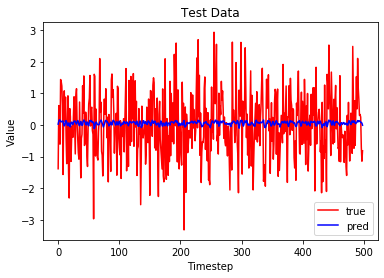

In [13]:
# Multiple Independent Train Sequences
seqLength = 500
numSeq = 42
trainSequences = Utility.generateMultipleSequence(
    dataGenerator=dataGenerator,
    numSequences=numSeq,
    minSequenceLength=seqLength,
    maxSequenceLength=seqLength
)
testData = dataGenerator.generate(seqLength)
tryModelMultiSeq(trainSequences, testData)